In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Data Description

In [2]:
df = pd.read_parquet('/Users/sameernigam/Desktop/ml-end-end-project/data/raw_data/raw_data_full.parquet')

In [3]:
df.head()

datetime  season  yr  mnth  hr  holiday  weekday  workingday  \
0  2011-01-01 00:00:00       1   0     1   0        0        6           0   
1  2011-01-01 01:00:00       1   0     1   1        0        6           0   
2  2011-01-01 02:00:00       1   0     1   2        0        6           0   
3  2011-01-01 03:00:00       1   0     1   3        0        6           0   
4  2011-01-01 04:00:00       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

# Feature Description

id: time slot identifier (not related to time order)

year: year (2011 or 2012)
 
hour: hour of the day (0 to 23)

season: 1 = winter, 2 = spring, 3 = summer, 4 = autumn

holiday: if the day was a holiday

workingday: if the day was a working day (neither a holiday nor a weekend)

weather: four categories (1 to 4) ranging from best to worst weather

temp: temperature in degrees Celsius

atemp: sensation of temperature in degrees Celsius

humidity: relative humidity

windspeed: wind speed (km/h)

count (only in the training set): total number of rentals in that band

# Data Profiling

In [4]:
df.describe()

season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098     35.676218    153.786869    189.463088  
std        0.192930      0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500      4.000000     34.000000     40.000000  
50%        0.630000      0.194000     17.000000    115.000000    142.000000  
75%        0.780000      0.253700     48.000000    220.000000    281.000000  
max        1.000000      0.850700    367.000000    886.000000    977.000000

In [5]:
from ydata_profiling import ProfileReport

In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1202.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Target and Feature Depedency Analysis

In [7]:
df.shape

(17379, 16)

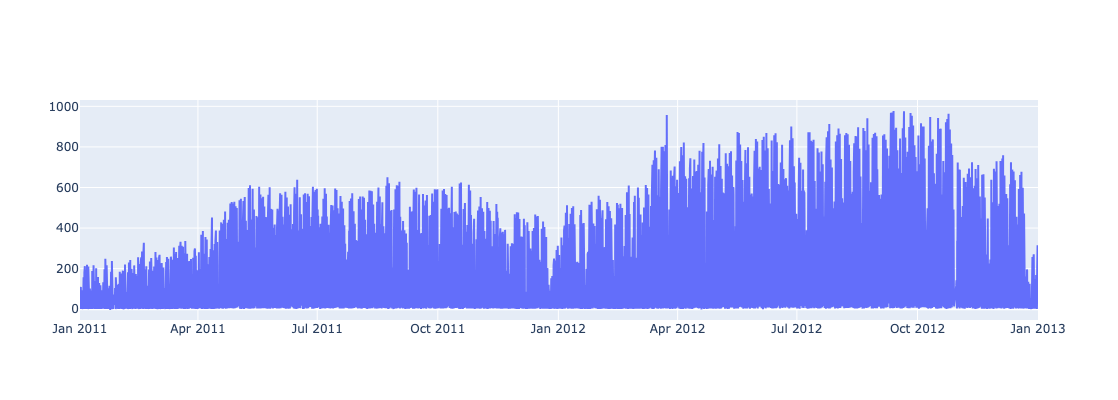

In [8]:
fig = go.Figure()

#Add Trace
fig.add_trace(go.Scatter(
    x = df["datetime"],
    y = df["cnt"],
    mode = "lines"
))

fig.update_layout(
    width  = 1000,
    height = 400)

fig.show()

In [9]:
%matplotlib inline
target_h = df.groupby('hr')['cnt'].mean()

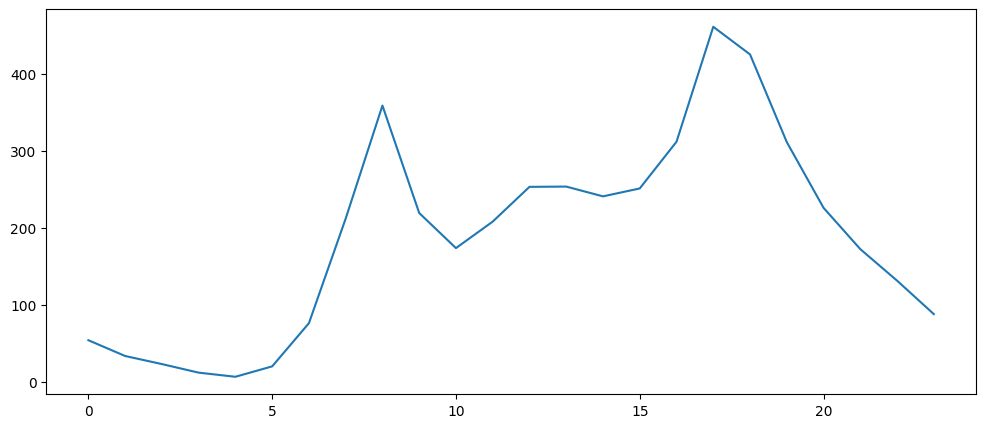

In [10]:
plt.figure(figsize = (12,5))
plt.plot(target_h)
plt.show()

# Rentals by Season

In [11]:
season_map = {
    1: "winter",
    2: "spring",
    3: "summer",
    4: "fall"
}

#apply mapping
df['season'] = df['season'].apply(lambda x: season_map.get(x, "unknown"))

In [12]:
season_stats = df.groupby('season')['cnt'].agg(['mean', 'median', 'count'])

In [13]:
season_stats

mean  median  count
season                           
fall    198.868856   155.5   4232
spring  208.344069   165.0   4409
summer  236.016237   199.0   4496
winter  111.114569    76.0   4242

<Axes: xlabel='season'>

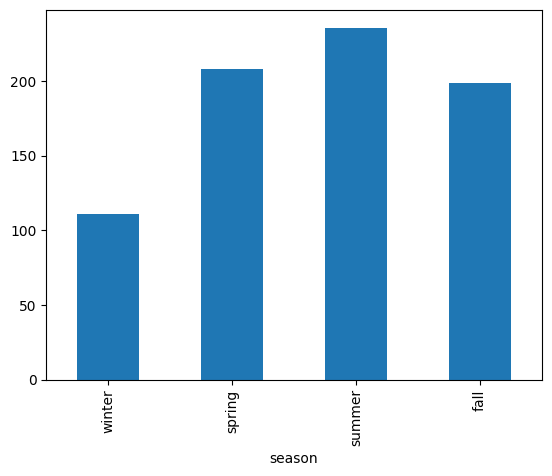

In [14]:
season_mean = df.groupby('season')['cnt'].mean().reindex(['winter', 'spring', 'summer', 'fall'])
season_mean.plot(kind = 'bar')

# Rentals by Weather

In [15]:
weather_map = {
    1: "clear",
    2: "cloudy",
    3: "rainfall",
    4: "snowfall"
}

#apply mapping
df['weathersit'] = df['weathersit'].map(weather_map)

In [16]:
weather_mean = df.groupby('weathersit')['cnt'].mean().reindex(['clear', 'cloudy', 'rainfall','snowfall'])

<Axes: xlabel='weathersit'>

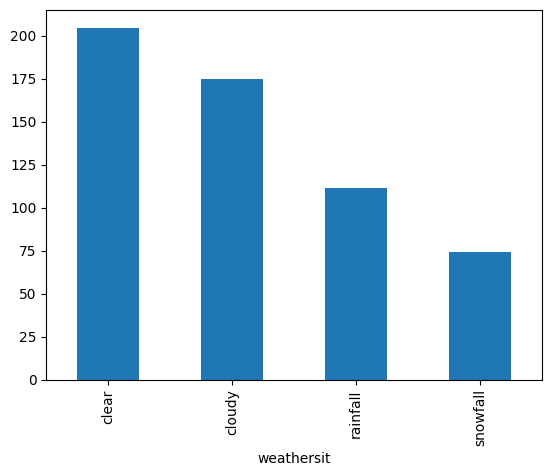

In [17]:
weather_mean.plot(kind = 'bar')

# Rentals by Weekday

In [18]:
weekday_map = {
    
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

#apply mapping
df['weekday_name'] = df['weekday'].map(weekday_map)

In [19]:
weekday_mean = df.groupby('weekday_name')['cnt'].mean().reindex(['Monday', 'Tuesday','Wednesday', 'Thursday',"Friday", "Saturday", 'Sunday'])

<Axes: xlabel='weekday_name'>

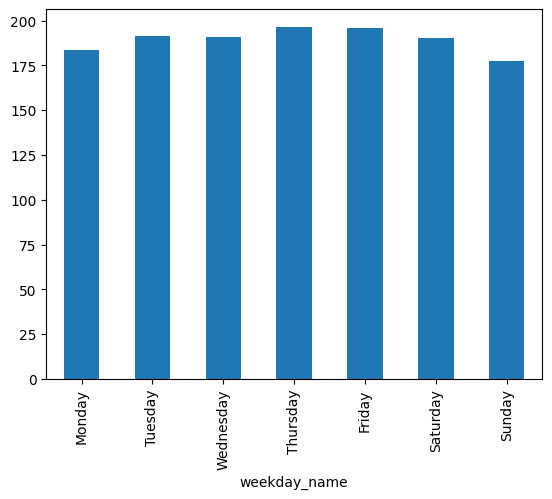

In [20]:
weekday_mean.plot(kind = 'bar')

In [21]:
holiday_map = {
    0: 'Non-holiday',
    1: 'Holiday'

}

df['holiday_name'] = df['holiday'].map(holiday_map)

In [22]:
holiday_mean = df.groupby('holiday_name')['cnt'].mean().reindex(['Non-holiday', 'Holiday'])

<Axes: xlabel='holiday_name'>

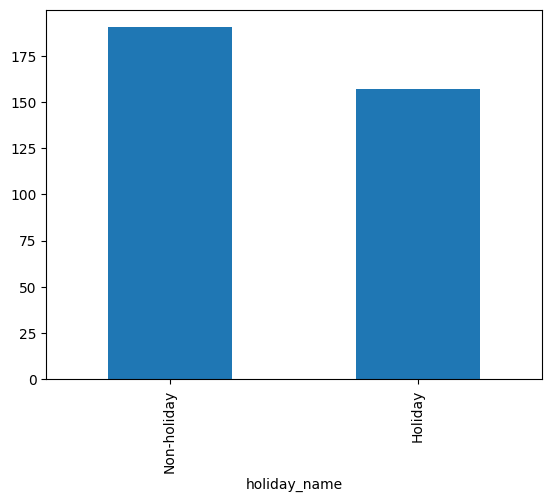

In [23]:
holiday_mean.plot(kind = 'bar')

# Rental vs Temprature

<Axes: xlabel='temp', ylabel='cnt'>

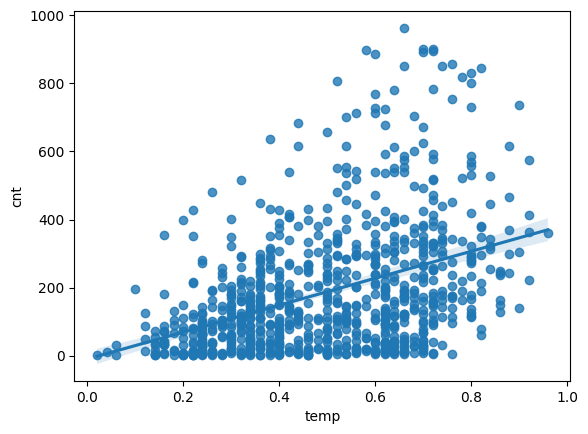

In [26]:
n = 20 #we can plot every nth point for better visibility 
sns.regplot(x = df['temp'][::n], y = df['cnt'][::n])

# Rental vs humidity

In [ ]:
n = 20 #we can plot every nth poiunt for better visibility of reg line
sns.regplot(x = df['hum'][::n], y = df['cnt'][::n])

# Rental vs Windspeed

In [ ]:
n = 20 #we can plot every nth poiunt for better visibility of reg line
sns.regplot(x = df['windspeed'][::n], y = df['cnt'][::n])

# Analysis Conclusion